<a href="https://colab.research.google.com/github/Ganesh7134/cardheko-used-car-price-prediction/blob/main/CarDheko_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv("/content/drive/MyDrive/kolkata.csv")
df2 = pd.read_csv("/content/drive/MyDrive/jaipur.csv")
df3 = pd.read_csv("/content/drive/MyDrive/hyderabad.csv")
df4 = pd.read_csv("/content/drive/MyDrive/delhi.csv")
df5 = pd.read_csv("/content/drive/MyDrive/banglore.csv")
df6 = pd.read_csv("/content/drive/MyDrive/chennai.csv")
df = pd.concat([df1,df2,df3,df4,df5,df6],axis=0)
df.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [4]:
len(df)

8369

In [5]:
fuel_type = []
body_type = []
kilometers = []
car_type = []
owner_no = []
owner = []
original_equip_manufacture = []
car_model = []
model_year = []
car_variant_name = []
asking_price_of_the_car = []
actual_price_of_the_car = []
negotiable_status = []
chance_of_selling = []

for i in df["new_car_detail"]:
    # Use eval cautiously, ensuring data is trusted and validated
    car_dict = eval(i) # Reading configuration files: If your configuration files are stored in a format that can be evaluated as Python code (e.g., JSON), you can use eval() to read them.
    fuel_type.append(car_dict['ft'])  # Access specific key
    body_type.append(car_dict["bt"])
    kilometers.append(car_dict["km"])
    car_type.append(car_dict["transmission"])
    owner_no.append(car_dict["ownerNo"])
    owner.append(car_dict["owner"])
    original_equip_manufacture.append(car_dict["oem"])
    car_model.append(car_dict["model"])
    model_year.append(car_dict["modelYear"])
    car_variant_name.append(car_dict["variantName"])
    if car_dict["price"].strip(" ").endswith("h"):
      # print(car_dict["price"])
      asking_price_of_the_car.append(int(float(car_dict["price"].replace("₹","").replace(" Lakh","").replace(",","").strip(" "))*100000))
    elif car_dict["price"].strip(" ").endswith("e"):
      asking_price_of_the_car.append(int(float(car_dict["price"].replace("₹","").replace(" Crore","").replace(",","").strip(" "))*10000000))
    else:
      asking_price_of_the_car.append(int(car_dict["price"].replace("₹","").replace(",","")))
    if car_dict["priceActual"].strip(" ").endswith("h"):
      # print(car_dict["price"])
      actual_price_of_the_car.append(int(float(car_dict["priceActual"].replace("₹","").replace(" Lakh","").replace(",","").strip(" "))*100000))
    elif car_dict["priceActual"].strip(" ").endswith("e"):
      actual_price_of_the_car.append(int(float(car_dict["priceActual"].replace("₹","").replace(" Crore","").replace(",","").strip(" "))*10000000))
    else:
      actual_price_of_the_car.append(int(car_dict["priceActual"].replace("₹","").replace(",","").replace("","0")))
    negotiable_status.append(car_dict["priceFixedText"])
    chance_of_selling.append(car_dict["trendingText"]["desc"])

In [6]:
len(actual_price_of_the_car)

8369

In [7]:
c = 0
reg_year = []
for i in df["new_car_overview"]:
  car_dict = eval(i)
  if car_dict["top"][0]["key"] == "Registration Year":
    reg_year.append(car_dict["top"][0]["value"])
  else:
    reg_year.append(0)

In [8]:
len(reg_year)

8369

In [9]:
date = pd.DataFrame({"registered_year":reg_year})

In [10]:
D = pd.to_datetime(date["registered_year"])

In [11]:
register_year = []
for i in D.dt.strftime("%m-%y"):
  register_year.append(i)

In [12]:
len(register_year)

8369

In [13]:
in_val = []
for i in df["new_car_overview"]:
  car_dict = eval(i)
  if car_dict["top"][1]["key"] == "Insurance Validity":
    in_val.append(car_dict["top"][1]["value"])
  else:
    in_val.append(0)

In [14]:
c = 0
seats = []
for i in df["new_car_overview"]:
  car_dict = eval(i)
  if car_dict["top"][3]["key"] == "Seats":
    seats.append(car_dict["top"][3]["value"])
  else:
    seats.append(0)

In [15]:
c = 0
mil = []
for i in df["new_car_specs"]:
  car_dict = eval(i)
  if car_dict["top"][0]["key"] == "Mileage":
    mil.append(car_dict["top"][0]["value"])
  else:
    mil.append(0)

In [16]:
# Add columns to the DataFrame
df['fuel_type'] = fuel_type
df['body_type'] = body_type
df['kilometers'] = kilometers
df['car_type'] = car_type
df['owner_no'] = owner_no
df['owner'] = owner
df['original_equip_manufacture'] = original_equip_manufacture
df['car_model'] = car_model
df['model_year'] = model_year
df['car_variant_name'] = car_variant_name
df['asking_price_of_the_car'] = asking_price_of_the_car
df['actual_price_of_the_car'] = actual_price_of_the_car
df['negotiable_status'] = negotiable_status
df['chance_of_selling'] = chance_of_selling
df['milege'] = mil
df['seats'] = seats
df['insurance_validation'] = in_val
df['register_year'] = register_year

In [17]:
df.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,fuel_type,body_type,kilometers,car_type,owner_no,...,model_year,car_variant_name,asking_price_of_the_car,actual_price_of_the_car,negotiable_status,chance_of_selling,milege,seats,insurance_validation,register_year
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,Sedan,"70,000",Automatic,3,...,2014,Hybrid,975000,0,None,High chances of sale in next 6 days,19.16 kmpl,5 Seats,Third Party insurance,01-14
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"23,981",Manual,1,...,2017,T Option,266000,0,None,High chances of sale in next 6 days,22.7 kmpl,5 Seats,Comprehensive,07-17
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,SUV,"7,100",Automatic,1,...,2021,RXT AMT,595000,0,None,High chances of sale in next 6 days,19.03 kmpl,5 Seats,Comprehensive,11-21
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,Hatchback,"71,574",Manual,2,...,2011,1.2 Sportz,223000,0,None,High chances of sale in next 6 days,17 kmpl,5 Seats,Third Party,02-12
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,SUV,"50,000",Automatic,2,...,2014,35 TDI Quattro Premium,1200000,0,None,High chances of sale in next 6 days,15.73 kmpl,5 Seats,Third Party insurance,01-14


In [18]:
df.drop(columns=["new_car_detail","new_car_overview","new_car_feature","new_car_specs","car_links"],inplace=True)

In [19]:
df

,fuel_type,body_type,kilometers,car_type,owner_no,owner,original_equip_manufacture,car_model,model_year,car_variant_name,asking_price_of_the_car,actual_price_of_the_car,negotiable_status,chance_of_selling,milege,seats,insurance_validation,register_year
0,Petrol,Sedan,"70,000",Automatic,3,3rd Owner,Toyota,Toyota Camry,2014,Hybrid,975000,0,None,High chances of sale in next 6 days,19.16 kmpl,5 Seats,Third Party insurance,01-14
1,Petrol,Hatchback,"23,981",Manual,1,1st Owner,Datsun,Datsun RediGO,2017,T Option,266000,0,None,High chances of sale in next 6 days,22.7 kmpl,5 Seats,Comprehensive,07-17
2,Petrol,SUV,"7,100",Automatic,1,1st Owner,Renault,Renault Kiger,2021,RXT AMT,595000,0,None,High chances of sale in next 6 days,19.03 kmpl,5 Seats,Comprehensive,11-21
3,Petrol,Hatchback,"71,574",Manual,2,2nd Owner,Hyundai,Hyundai i20,2011,1.2 Sportz,223000,0,None,High chances of sale in next 6 days,17 kmpl,5 Seats,Third Party,02-12
4,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Audi,Audi Q3,2014,35 TDI Quattro Premium,1200000,0,None,High chances of sale in next 6 days,15.73 kmpl,5 Seats,Third Party insurance,01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,Petrol,Hatchback,"42,891",Automatic,1,1st Owner,Maruti,Maruti Swift,2018,AMT VXI,620000,0,None,High chances of sale in next 6 days,22 kmpl,5 Seats,Third Party insurance,06-18
1415,Diesel,SUV,"59,100",Manual,1,1st Owner,Renault,Renault Duster,2018,85PS Diesel RxZ,890000,0,None,High chances of sale in next 6 days,19.87 kmpl,5 Seats,Third Party insurance,02-19
1416,Petrol,SUV,"55,913",Automatic,1,1st Owner,Tata,Tata Nexon,2018,1.2 Revotron XZA Plus,801000,0,None,High chances of sale in next 6 days,17 kmpl,5 Seats,Not Available,08-18
1417,Diesel,SUV,"65,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Tiguan,2017,2.0 TDI Highline,2050000,0,None,High chances of sale in next 6 days,16.65 kmpl,5 Seats,Comprehensive,08-17


In [20]:
len(df)

8369

In [21]:
df.to_csv("modified_cardheko_dataset.csv",index=False)

In [22]:
df.isna().sum()

fuel_type                        0
body_type                        0
kilometers                       0
car_type                         0
owner_no                         0
owner                            0
original_equip_manufacture       0
car_model                        0
model_year                       0
car_variant_name                 0
asking_price_of_the_car          0
actual_price_of_the_car          0
negotiable_status             8369
chance_of_selling                0
milege                           0
seats                            0
insurance_validation             0
register_year                    0
dtype: int64

In [23]:
df["negotiable_status"] = df["negotiable_status"].fillna("No")

In [24]:
df.isna().sum()

fuel_type                     0
body_type                     0
kilometers                    0
car_type                      0
owner_no                      0
owner                         0
original_equip_manufacture    0
car_model                     0
model_year                    0
car_variant_name              0
asking_price_of_the_car       0
actual_price_of_the_car       0
negotiable_status             0
chance_of_selling             0
milege                        0
seats                         0
insurance_validation          0
register_year                 0
dtype: int64

In [25]:
df = df.replace("0",None)

In [26]:
df.isna().sum()

fuel_type                     0
body_type                     0
kilometers                    2
car_type                      0
owner_no                      0
owner                         0
original_equip_manufacture    0
car_model                     0
model_year                    0
car_variant_name              0
asking_price_of_the_car       0
actual_price_of_the_car       0
negotiable_status             0
chance_of_selling             0
milege                        0
seats                         0
insurance_validation          0
register_year                 0
dtype: int64

In [27]:
df = df.replace(0,None)

In [28]:
df.isna().sum()

fuel_type                        0
body_type                        0
kilometers                       2
car_type                         0
owner_no                        32
owner                            0
original_equip_manufacture       0
car_model                        0
model_year                       0
car_variant_name                 0
asking_price_of_the_car          0
actual_price_of_the_car       6699
negotiable_status                0
chance_of_selling                0
milege                         287
seats                           62
insurance_validation            56
register_year                    0
dtype: int64

In [29]:
df["kilometers"].mode()[0]

'1,20,000'

In [30]:
df["kilometers"] = df["kilometers"].fillna(df["kilometers"].mode()[0])

In [31]:
df.isna().sum()

fuel_type                        0
body_type                        0
kilometers                       0
car_type                         0
owner_no                        32
owner                            0
original_equip_manufacture       0
car_model                        0
model_year                       0
car_variant_name                 0
asking_price_of_the_car          0
actual_price_of_the_car       6699
negotiable_status                0
chance_of_selling                0
milege                         287
seats                           62
insurance_validation            56
register_year                    0
dtype: int64

In [32]:
int(df["owner_no"].mean())

1

In [33]:
df["owner_no"] = df["owner_no"].fillna(int(df["owner_no"].mean()))

In [34]:
df.isna().sum()

fuel_type                        0
body_type                        0
kilometers                       0
car_type                         0
owner_no                         0
owner                            0
original_equip_manufacture       0
car_model                        0
model_year                       0
car_variant_name                 0
asking_price_of_the_car          0
actual_price_of_the_car       6699
negotiable_status                0
chance_of_selling                0
milege                         287
seats                           62
insurance_validation            56
register_year                    0
dtype: int64

In [35]:
df.drop(columns=["actual_price_of_the_car"],inplace=True)

In [36]:
df.isna().sum()

fuel_type                       0
body_type                       0
kilometers                      0
car_type                        0
owner_no                        0
owner                           0
original_equip_manufacture      0
car_model                       0
model_year                      0
car_variant_name                0
asking_price_of_the_car         0
negotiable_status               0
chance_of_selling               0
milege                        287
seats                          62
insurance_validation           56
register_year                   0
dtype: int64

In [37]:
df["milege"].value_counts()

18.9 kmpl     306
18.6 kmpl     225
21.4 kmpl     198
17 kmpl       191
18 kmpl       145
             ... 
11.81 kmpl      1
12.33 kmpl      1
7.08 kmpl       1
17.97 kmpl      1
14.85 kmpl      1
Name: milege, Length: 522, dtype: int64

In [38]:
df["milege"].mode()

0    18.9 kmpl
Name: milege, dtype: object

In [39]:
df["milege"] = df["milege"].fillna(df["milege"].mode()[0])

In [40]:
df.isna().sum()

fuel_type                      0
body_type                      0
kilometers                     0
car_type                       0
owner_no                       0
owner                          0
original_equip_manufacture     0
car_model                      0
model_year                     0
car_variant_name               0
asking_price_of_the_car        0
negotiable_status              0
chance_of_selling              0
milege                         0
seats                         62
insurance_validation          56
register_year                  0
dtype: int64

In [41]:
df["seats"].value_counts()

5 Seats     7308
7 Seats      727
6 Seats       98
4 Seats       91
8 Seats       61
9 Seats       11
2 Seats        7
10 Seats       4
Name: seats, dtype: int64

In [42]:
df["seats"].mode()[0]

'5 Seats'

In [43]:
df["seats"] = df["seats"].fillna(df["seats"].mode()[0])

In [44]:
df.isna().sum()

fuel_type                      0
body_type                      0
kilometers                     0
car_type                       0
owner_no                       0
owner                          0
original_equip_manufacture     0
car_model                      0
model_year                     0
car_variant_name               0
asking_price_of_the_car        0
negotiable_status              0
chance_of_selling              0
milege                         0
seats                          0
insurance_validation          56
register_year                  0
dtype: int64

In [45]:
df["insurance_validation"].value_counts()

Third Party insurance    4013
Comprehensive            3143
Third Party               628
Zero Dep                  303
Not Available             222
1                           3
2                           1
Name: insurance_validation, dtype: int64

In [46]:
df["insurance_validation"] = df["insurance_validation"].fillna(df["insurance_validation"].mode()[0])

In [47]:
df.isna().sum()

fuel_type                     0
body_type                     0
kilometers                    0
car_type                      0
owner_no                      0
owner                         0
original_equip_manufacture    0
car_model                     0
model_year                    0
car_variant_name              0
asking_price_of_the_car       0
negotiable_status             0
chance_of_selling             0
milege                        0
seats                         0
insurance_validation          0
register_year                 0
dtype: int64

In [48]:
df.to_csv("filtered_cardheko_dataset.csv",index=False)

In [49]:
df.rename(columns={"asking_price_of_the_car":"price"},inplace=True)

In [51]:
import numpy as np

# Calculate IQR for numerical columns and store them in a dictionary
iqr_values = {}
num = df.select_dtypes(np.number)
num_columns = num.columns
for col in num_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr_values[col] = q3 - q1

def treat_outliers_IQR(df):
    # Use the stored IQR values to identify outliers
    num = df.select_dtypes(np.number)
    num_columns = num.columns
    for col in num_columns:
        lower_bound = q1 - 1.5 * iqr_values[col]
        upper_bound = q3 + 1.5 * iqr_values[col]
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        return outliers

In [52]:
treat_outliers_IQR(df)

,fuel_type,body_type,kilometers,car_type,owner_no,owner,original_equip_manufacture,car_model,model_year,car_variant_name,price,negotiable_status,chance_of_selling,milege,seats,insurance_validation,register_year
0,Petrol,Sedan,"70,000",Automatic,3,3rd Owner,Toyota,Toyota Camry,2014,Hybrid,975000,No,High chances of sale in next 6 days,19.16 kmpl,5 Seats,Third Party insurance,01-14
1,Petrol,Hatchback,"23,981",Manual,1,1st Owner,Datsun,Datsun RediGO,2017,T Option,266000,No,High chances of sale in next 6 days,22.7 kmpl,5 Seats,Comprehensive,07-17
2,Petrol,SUV,"7,100",Automatic,1,1st Owner,Renault,Renault Kiger,2021,RXT AMT,595000,No,High chances of sale in next 6 days,19.03 kmpl,5 Seats,Comprehensive,11-21
3,Petrol,Hatchback,"71,574",Manual,2,2nd Owner,Hyundai,Hyundai i20,2011,1.2 Sportz,223000,No,High chances of sale in next 6 days,17 kmpl,5 Seats,Third Party,02-12
4,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Audi,Audi Q3,2014,35 TDI Quattro Premium,1200000,No,High chances of sale in next 6 days,15.73 kmpl,5 Seats,Third Party insurance,01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,Petrol,Hatchback,"42,891",Automatic,1,1st Owner,Maruti,Maruti Swift,2018,AMT VXI,620000,No,High chances of sale in next 6 days,22 kmpl,5 Seats,Third Party insurance,06-18
1415,Diesel,SUV,"59,100",Manual,1,1st Owner,Renault,Renault Duster,2018,85PS Diesel RxZ,890000,No,High chances of sale in next 6 days,19.87 kmpl,5 Seats,Third Party insurance,02-19
1416,Petrol,SUV,"55,913",Automatic,1,1st Owner,Tata,Tata Nexon,2018,1.2 Revotron XZA Plus,801000,No,High chances of sale in next 6 days,17 kmpl,5 Seats,Not Available,08-18
1417,Diesel,SUV,"65,000",Automatic,1,1st Owner,Volkswagen,Volkswagen Tiguan,2017,2.0 TDI Highline,2050000,No,High chances of sale in next 6 days,16.65 kmpl,5 Seats,Comprehensive,08-17


In [53]:
import numpy as np
num = df.select_dtypes(np.number)

In [54]:
import warnings
warnings.filterwarnings("ignore")

owner_no
1.9628686140430545


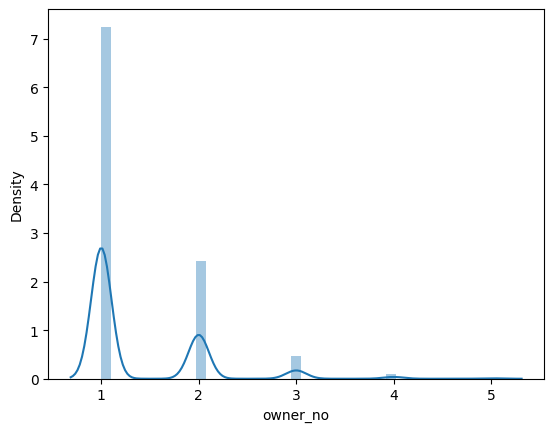

model_year
-0.9117351462798478


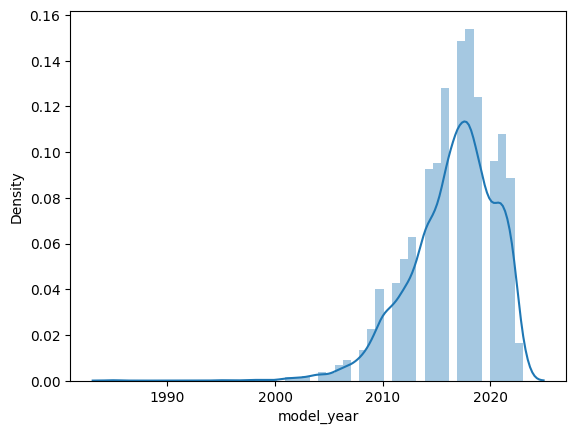

price
10.002946124288535


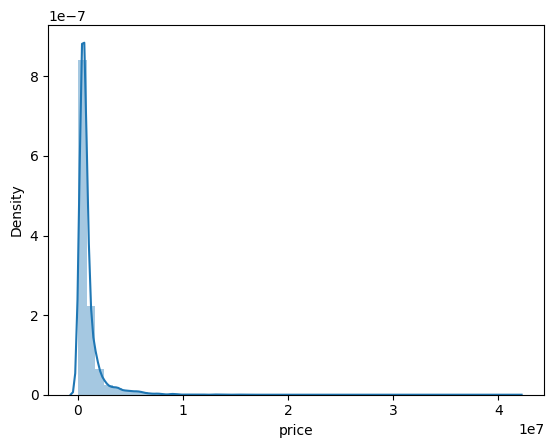

In [55]:
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt

for i in num.columns:
  print(i)
  print(skew(num[i]))
  plt.figure()
  sns.distplot(num[i])
  plt.show()

In [56]:
mask1 = df["price"] <= 0
print(mask1.sum())
df.loc[mask1,"price"] = np.nan

mask2 = df["model_year"] <= 0
print(mask2.sum())
df.loc[mask2,"model_year"] = np.nan

mask3 = df["owner_no"] <= 0
print(mask3.sum())
df.loc[mask3,"owner_no"]

0
0
0


Series([], Name: owner_no, dtype: int64)

In [57]:
df.isna().sum()

fuel_type                     0
body_type                     0
kilometers                    0
car_type                      0
owner_no                      0
owner                         0
original_equip_manufacture    0
car_model                     0
model_year                    0
car_variant_name              0
price                         0
negotiable_status             0
chance_of_selling             0
milege                        0
seats                         0
insurance_validation          0
register_year                 0
dtype: int64

0.3739881761441823


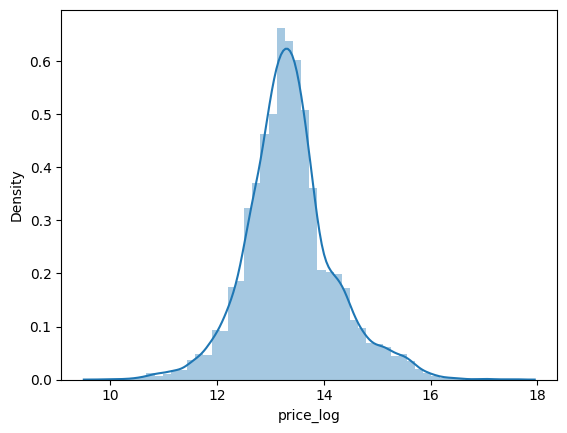

1.2521307758738176


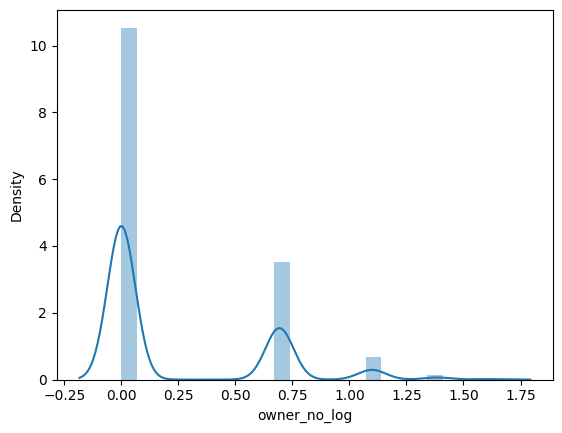

In [58]:
df["price_log"] = np.log(df["price"])
print(skew(df["price_log"]))
sns.distplot(df["price_log"])
plt.show()

df["owner_no_log"] = np.log(df["owner_no"])
print(skew(df["owner_no_log"]))
sns.distplot(df["owner_no_log"])
plt.show()

#**EDA**

In [59]:
df.columns

Index(['fuel_type', 'body_type', 'kilometers', 'car_type', 'owner_no', 'owner',
       'original_equip_manufacture', 'car_model', 'model_year',
       'car_variant_name', 'price', 'negotiable_status', 'chance_of_selling',
       'milege', 'seats', 'insurance_validation', 'register_year', 'price_log',
       'owner_no_log'],
      dtype='object')

##**How the price vary by fuel_type**

<Axes: xlabel='fuel_type'>

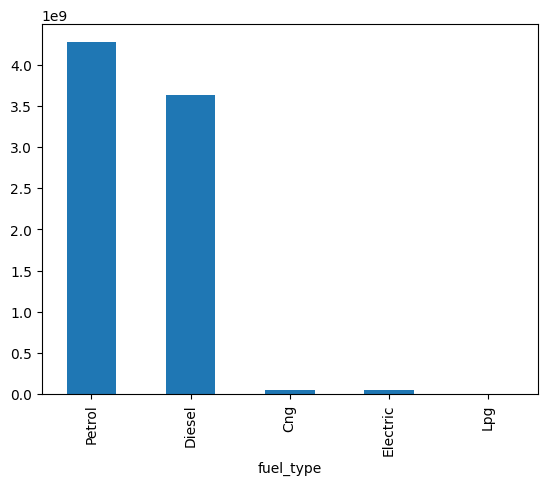

In [60]:
df.groupby("fuel_type")["price"].sum().sort_values(ascending=False).plot(kind="bar")

In [61]:
df.drop(df[df["body_type"]==""].index,axis=0,inplace=True)

<Axes: xlabel='body_type'>

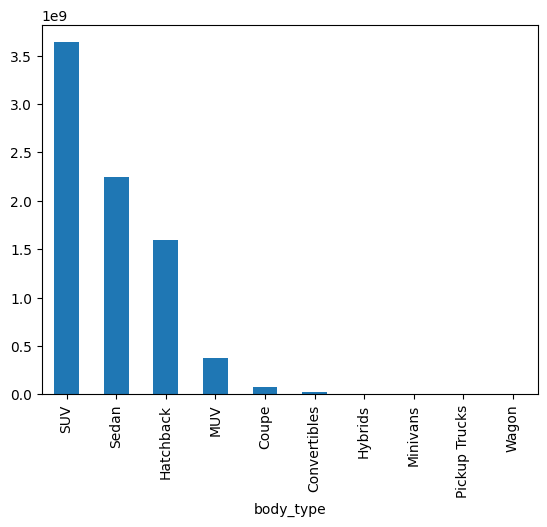

In [62]:
df.groupby("body_type")["price"].sum().sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='original_equip_manufacture'>

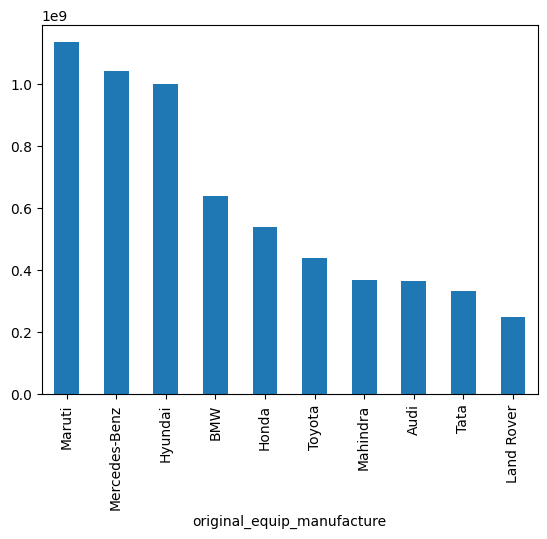

In [63]:
df.groupby("original_equip_manufacture")["price"].sum().sort_values(ascending=False)[:10].plot(kind="bar")

<Axes: xlabel='car_type'>

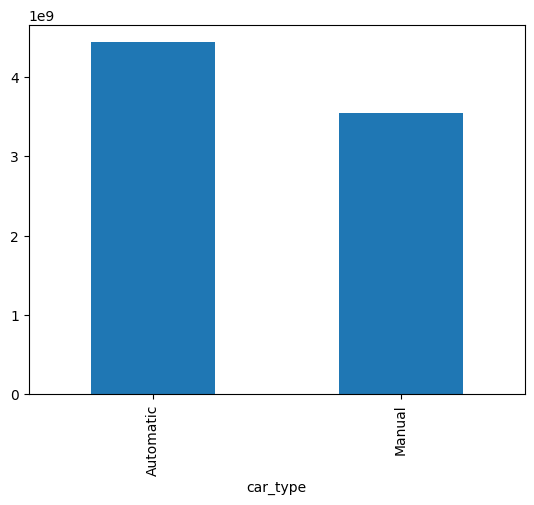

In [64]:
df.groupby("car_type")["price"].sum().sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='owner'>

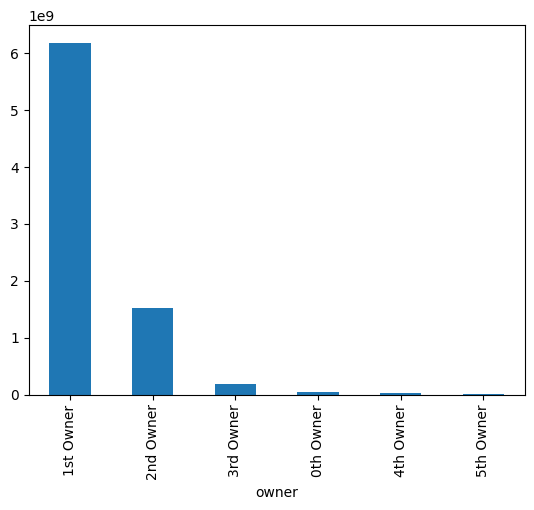

In [65]:
df.groupby("owner")["price"].sum().sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='milege'>

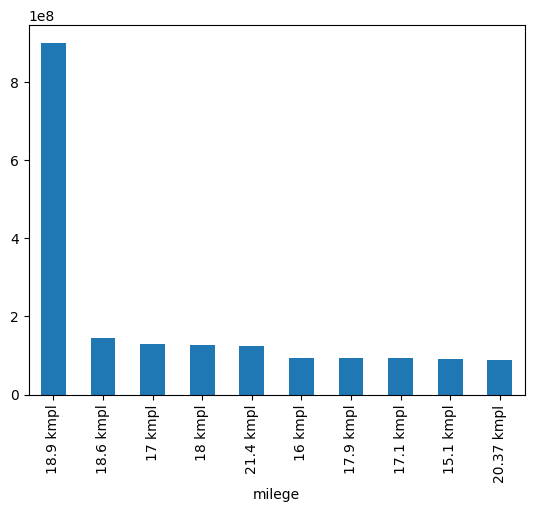

In [66]:
df.groupby("milege")["price"].sum().sort_values(ascending=False)[:10].plot(kind="bar")

<Axes: xlabel='seats'>

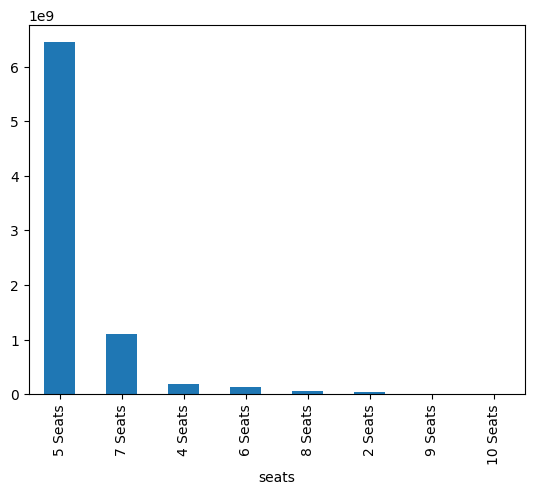

In [67]:
df.groupby("seats")["price"].sum().sort_values(ascending=False).plot(kind="bar")

1. **Third Party insurance:**

* This is the most basic level of car insurance required by law in most countries.
* It covers damage caused to other people's property and vehicles in an accident you are responsible for.
* It does not cover damage to your own vehicle or injuries sustained by you or your passengers.
2. **Comprehensive insurance**:

* This type of insurance provides the most comprehensive coverage.
* It covers damage to both your own vehicle and other people's property and vehicles in an accident, regardless of who is at fault.
* It may also cover additional benefits like theft, vandalism, and natural disasters.

3. **Third Party (limited)**:

* This category is less common and might refer to a restricted version of Third Party insurance, potentially covering only specific situations or with lower limits of liability.
* Without more information, it's difficult to provide a definitive explanation.

4. **Zero Dep**:

* This refers to Zero Depreciation insurance, which eliminates depreciation deductions when making claims for damage to your own vehicle.
* This means you receive the full insured value of your car, regardless of its age or depreciation.

5. **Not Available**:

* This category likely indicates instances where insurance information was not available for the car during validation.
* Reasons for this could be missing documentation, expired insurance, or issues with data retrieval.

6. **1 and 2**:

* These categories are unclear without additional context. They might represent numerical codes associated with specific insurance types or validation statuses.
* More information is needed to interpret their meaning accurately.

<Axes: xlabel='insurance_validation'>

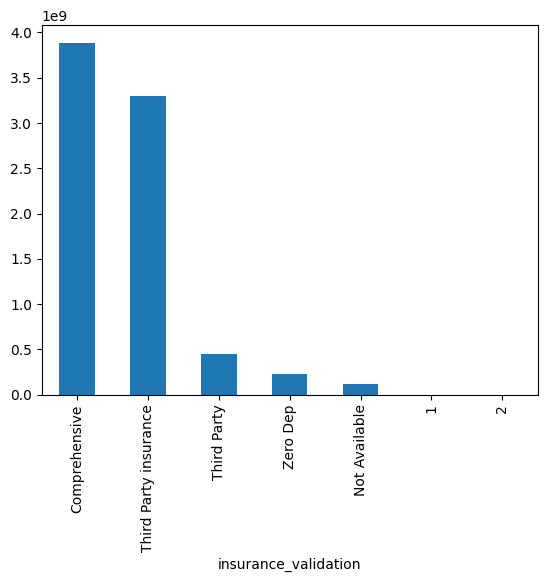

In [68]:
df.groupby("insurance_validation")["price"].sum().sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='register_year'>

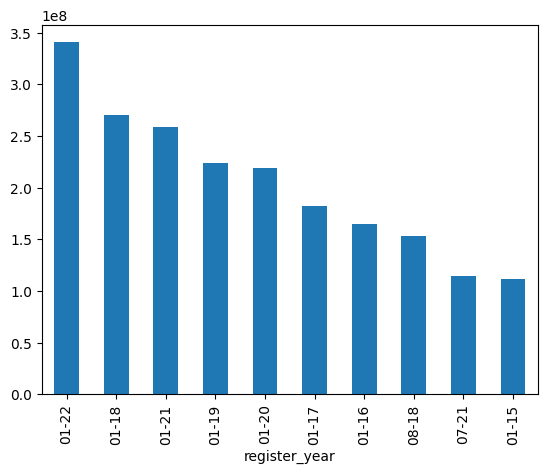

In [69]:
df.groupby("register_year")["price"].sum().sort_values(ascending=False)[:10].plot(kind="bar")

<Axes: ylabel='price'>

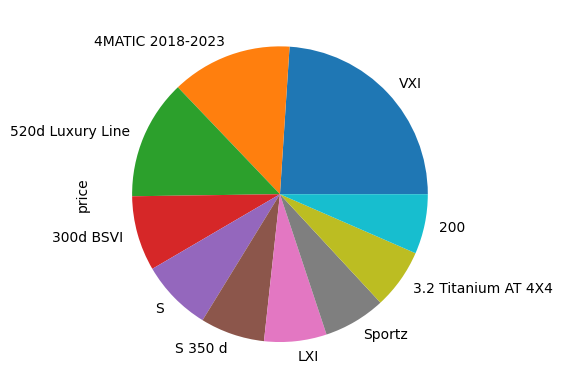

In [70]:
df.groupby("car_variant_name")["price"].sum().sort_values(ascending=False)[:10].plot(kind="pie")

#**finding Category variables by target price using spearman's correlation**

**Spearman's Correlation Coefficient**:

Measures the strength and direction of the monotonic relationship between two variables, even if it's not linear.

**Ranges from -1 to +1**:

* **-1**: Perfect negative correlation (as one variable increases, the other decreases perfectly).
* **0**: No correlation (no relationship between the variables).
* **+1**: Perfect positive correlation (as one variable increases, the other increases perfectly).

>In your case, -0.0198 indicates a very weak negative correlation, meaning there's a slight tendency for Rating to decrease as level increases, but it's not a strong relationship.

Image of Spearman correlation coefficient scaleOpens in a new window

**Spearman correlation coefficient scale**

**p-value**:

Probability of observing a correlation coefficient as extreme or more extreme than the one calculated, **assuming there's no true correlation in the population**.

* A common significance threshold is 0.05. **If p-value is below 0.05, we reject the null hypothesis of no correlation** and conclude there's a statistically significant correlation.

* In your case, 0.2299 is higher than 0.05, **so we cannot reject the null hypothesis. We don't have enough evidence to conclude there's a statistically significant correlation between *level* and *Rating***

In [71]:
from scipy.stats import spearmanr
print(spearmanr(df["fuel_type"],df["price_log"]))

SignificanceResult(statistic=-0.26364352928083346, pvalue=9.746579588830552e-133)


In [72]:
print(spearmanr(df["body_type"],df["price_log"])) # here p value less than 0.05 we reject null hypothesis moderately positive correlation

SignificanceResult(statistic=0.39892981651631615, pvalue=0.0)


In [73]:
print(spearmanr(df["car_type"],df["price_log"])) # negatively correlated

SignificanceResult(statistic=-0.5050802692168058, pvalue=0.0)


In [74]:
print(spearmanr(df["original_equip_manufacture"],df["price_log"])) # no such relationship

SignificanceResult(statistic=0.0037830167878476102, pvalue=0.7296790973767755)


In [75]:
print(spearmanr(df["owner"],df["price_log"])) # no such relationship

SignificanceResult(statistic=-0.2443048021191296, pvalue=1.1201654838614264e-113)


In [76]:
print(spearmanr(df["milege"],df["price_log"])) # negative correlation but null hypothesis not rejected

SignificanceResult(statistic=-0.33362254946978376, pvalue=4.130619946418448e-216)


In [77]:
print(spearmanr(df["seats"],df["price_log"])) # low positive correlation but null hypothesis not rejected

SignificanceResult(statistic=0.20698067418601798, pvalue=1.9488047967652868e-81)


In [78]:
print(spearmanr(df["insurance_validation"],df["price_log"])) # very low negative correlation null hypothesis not rejected

SignificanceResult(statistic=-0.11903425497085772, pvalue=1.0130824988810157e-27)


In [79]:
print(spearmanr(df["register_year"],df["price_log"])) # positive correlation null hypothesis not rejected

SignificanceResult(statistic=0.24352780953836564, pvalue=6.037857384759001e-113)


In [80]:
spearmanr(df["car_variant_name"],df["price_log"])

SignificanceResult(statistic=-0.01880821093919966, pvalue=0.08577000923831875)

In [81]:
x = df[["price_log","owner_no_log","model_year"]].corr()

Axes(0.125,0.11;0.62x0.77)


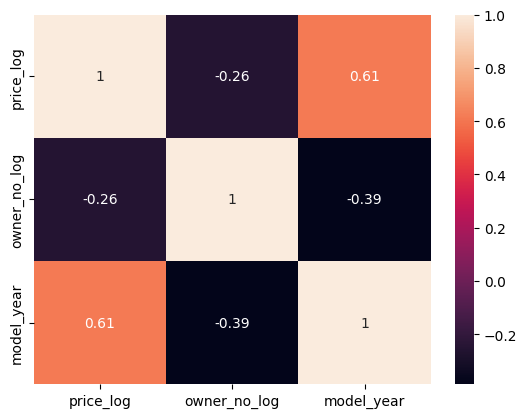

In [82]:
import seaborn as sns
print(sns.heatmap(x,annot=True)) # model_year has 0.6 correlation which better to take into our model

In [83]:
# model_year # numeric
# body_type # one-hot
# car_type # one-hot
# register_year # frequency
# seats # one-hot encoding
# fuel_type # one-hot
# Insurance_validation # one-hot

In [84]:
len(df['register_year'].value_counts())

216

In [85]:
# Calculate category frequencies
value_counts = df['register_year'].value_counts()

# Create a dictionary mapping categories to frequencies
freq_dict = value_counts.to_dict()

# Add a new column with encoded values (frequency counts)
df['register_year_freq'] = df['register_year'].replace(freq_dict)


In [86]:
# Calculate category frequencies
value_counts = df['car_variant_name'].value_counts()

# Create a dictionary mapping categories to frequencies
freq_dict = value_counts.to_dict()

# Add a new column with encoded values (frequency counts)
df['car_varient_name_freq'] = df['car_variant_name'].replace(freq_dict)

In [87]:
# Calculate category frequencies
value_counts = df['original_equip_manufacture'].value_counts()

# Create a dictionary mapping categories to frequencies
freq_dict = value_counts.to_dict()

# Add a new column with encoded values (frequency counts)
df['original_equip_manufacture_freq'] = df['original_equip_manufacture'].replace(freq_dict)

In [88]:
len(df["owner"].value_counts())

6

In [89]:
df.head()

,fuel_type,body_type,kilometers,car_type,owner_no,owner,original_equip_manufacture,car_model,model_year,car_variant_name,...,chance_of_selling,milege,seats,insurance_validation,register_year,price_log,owner_no_log,register_year_freq,car_varient_name_freq,original_equip_manufacture_freq
0,Petrol,Sedan,"70,000",Automatic,3,3rd Owner,Toyota,Toyota Camry,2014.0,Hybrid,...,High chances of sale in next 6 days,19.16 kmpl,5 Seats,Third Party insurance,01-14,13.790193,1.098612,204,6,324
1,Petrol,Hatchback,"23,981",Manual,1,1st Owner,Datsun,Datsun RediGO,2017.0,T Option,...,High chances of sale in next 6 days,22.7 kmpl,5 Seats,Comprehensive,07-17,12.491252,0.000000,87,15,74
2,Petrol,SUV,"7,100",Automatic,1,1st Owner,Renault,Renault Kiger,2021.0,RXT AMT,...,High chances of sale in next 6 days,19.03 kmpl,5 Seats,Comprehensive,11-21,13.296317,0.000000,38,5,310
3,Petrol,Hatchback,"71,574",Manual,2,2nd Owner,Hyundai,Hyundai i20,2011.0,1.2 Sportz,...,High chances of sale in next 6 days,17 kmpl,5 Seats,Third Party,02-12,12.314927,0.693147,10,9,1649
4,Diesel,SUV,"50,000",Automatic,2,2nd Owner,Audi,Audi Q3,2014.0,35 TDI Quattro Premium,...,High chances of sale in next 6 days,15.73 kmpl,5 Seats,Third Party insurance,01-14,13.997832,0.693147,204,5,155


##**Applying Machine learning model**

In [90]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# model_year # numeric
# body_type # one-hot
# car_type # one-hot
# register_year # frequency
# seats # one-hot encoding
# fuel_type # one-hot
# Insurance_validation # one-hot

X = df.loc[:,["model_year","register_year","car_variant_name","original_equip_manufacture","body_type","car_type","seats","fuel_type","insurance_validation","milege","owner"]]
Y = df.loc[:,["price_log"]]


Ohe1 = OneHotEncoder(handle_unknown="ignore")
body_ohe = Ohe1.fit_transform(X[["body_type"]]).toarray()

Ohe2 = OneHotEncoder(handle_unknown="ignore")
car_ohe = Ohe2.fit_transform(X[["car_type"]]).toarray()

Ohe3 = OneHotEncoder(handle_unknown="ignore")
seats_ohe = Ohe3.fit_transform(X[["seats"]]).toarray()

Ohe4 = OneHotEncoder(handle_unknown="ignore")
fuel_ohe = Ohe4.fit_transform(X[["seats"]]).toarray()

Ohe5 = OneHotEncoder(handle_unknown="ignore")
insurance_ohe = Ohe5.fit_transform(X[["insurance_validation"]]).toarray()

Ohe6 = OneHotEncoder(handle_unknown="ignore")
mil_ohe = Ohe6.fit_transform(X[["milege"]]).toarray()

Ohe7 = OneHotEncoder(handle_unknown="ignore")
own_ohe = Ohe7.fit_transform(X[["owner"]]).toarray()

Ohe8 = OneHotEncoder(handle_unknown="ignore")
reg_year_ohe = Ohe8.fit_transform(X[["register_year"]]).toarray()

Ohe9 = OneHotEncoder(handle_unknown="ignore")
car_var_ohe = Ohe9.fit_transform(X[["car_variant_name"]]).toarray()

Ohe10 = OneHotEncoder(handle_unknown="ignore")
orig_eq_ohe = Ohe10.fit_transform(X[["original_equip_manufacture"]]).toarray()



X = np.concatenate((X[["model_year"]].values , reg_year_ohe , car_var_ohe , orig_eq_ohe , body_ohe , car_ohe, seats_ohe , fuel_ohe , insurance_ohe , mil_ohe , own_ohe), axis=1)
ss = StandardScaler()
ss.fit_transform(X)

x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 1)

# dtr = DecisionTreeRegressor(random_state=1)

# dtr.fit(x_train,y_train)

rfr = RandomForestRegressor(random_state=1)
rfr.fit(x_train,y_train)

# xg = xgb.XGBRegressor()
# xg.fit(x_train,y_train)

y_pred = rfr.predict(x_test)

r2 = r2_score(y_test,y_pred)

print("R2-score: ",r2)

mse = mean_squared_error(y_test,y_pred)

print("mean-squared-error: ",mse)


R2-score:  0.9101800155652101
mean-squared-error:  0.05804534784017558


In [91]:
rfr.score(x_train,y_train)

0.9853974740023671

In [92]:
new_test = np.array([[2020,"01-20","Hybrid","Audi","SUV","Manual","6 Seats","Petrol","Comprehensive","17 kmpl","1st Owner"]])

new_test_year = Ohe8.transform(new_test[:, [1]]).toarray()
new_test_car_var = Ohe9.transform(new_test[:, [2]]).toarray()
new_test_oem = Ohe10.transform(new_test[:,[3]]).toarray()
new_test_body = Ohe1.transform(new_test[:,[4]]).toarray()
new_test_car = Ohe2.transform(new_test[:,[5]]).toarray()
new_test_seats = Ohe3.transform(new_test[:,[6]]).toarray()
new_test_fuel = Ohe4.transform(new_test[:,[7]]).toarray()
new_test_ins = Ohe5.transform(new_test[:,[8]]).toarray()
new_test_mil = Ohe6.transform(new_test[:,[9]]).toarray()
new_test_own = Ohe7.transform(new_test[:,[10]]).toarray()





new_test = np.concatenate((new_test[:, [0]], new_test_year , new_test_car_var , new_test_oem , new_test_body , new_test_car , new_test_seats , new_test_fuel , new_test_ins , new_test_mil , new_test_own), axis=1)
# print(new_test[0].shape)
new_test1 = ss.transform(new_test)
new_pred = rfr.predict(new_test1)
print('Cardheko used car predicted price:', float(np.exp(new_pred)))

Cardheko used car predicted price: 345011.53746515466


In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Assuming you have your X_train and y_train data ready

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 7],
    'max_features': [2, "sqrt", "log2"]
}

# Create the RandomForestRegressor and GridSearchCV objects
rf = RandomForestRegressor(random_state=1)
grid_search = GridSearchCV(rf, param_grid, cv=5,scoring="r2")

# Fit the model and get the best parameters
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters and score
print(f"Best parameters: {best_params}")
print(f"Best score: {grid_search.best_score_}")

# Use the best model for prediction or further analysis


Best parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 100}
Best score: 0.3829426663261094


1. **Overfitting**: During hyperparameter tuning, you might have explored parameter combinations that led to models overfitting the training data. This means the model performs well on the training set but poorly generalizes to unseen data. To check for overfitting, compare the training and validation R^2 scores. A large discrepancy indicates overfitting.

In [94]:
best_model.score(x_train,y_train)

0.40286569894444324